<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Library import</h2>
</div>

In [161]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras import backend as K
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

In [162]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.random.seed(80)

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Dataset Features</h2>
</div>

**The dataset contains an airline passenger satisfaction survey.**

**Attributes:**
* `Gender` Gender of the passengers (Female, Male)
 
* `Customer Type:` The customer type (Loyal customer, disloyal customer)
 
* `Age:` The actual age of the passengers
 
* `Type of Travel:` Purpose of the flight of the passengers (Personal Travel, Business Travel)
 
* `Class:` Travel class in the plane of the passengers (Business, Eco, Eco Plus)
 
* `Flight distance:` The flight distance of this journey
 
* `Inflight wifi service:` Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
 
* `Departure/Arrival time convenient:` Satisfaction level of Departure/Arrival time convenient
 
* `Ease of Online booking:` Satisfaction level of online booking

* `Gate location:` Satisfaction level of Gate location
 
* `Food and drink:` Satisfaction level of Food and drink

* `Online boarding:` Satisfaction level of online boarding

* `Seat comfort:` Satisfaction level of Seat comfort
 
* `Inflight entertainment:` Satisfaction level of inflight entertainment
 
* `On-board service:` Satisfaction level of On-board service

* `Leg room service:` Satisfaction level of Leg room service

* `Baggage handling:` Satisfaction level of baggage handling

* `Check-in service:` Satisfaction level of Check-in service

* `Inflight service:` Satisfaction level of inflight service

* `Cleanliness:` Satisfaction level of Cleanliness

* `Departure Delay in Minutes:` Minutes delayed when departure

* `Arrival Delay in Minutes:` Minutes delayed when Arrival

* `Satisfaction:` Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Load and analyse data</h2>
</div>

In [163]:
df=pd.read_csv("data/podaci.csv")

In [164]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [165]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [167]:
#df.drop("id",axis=1,inplace=True)

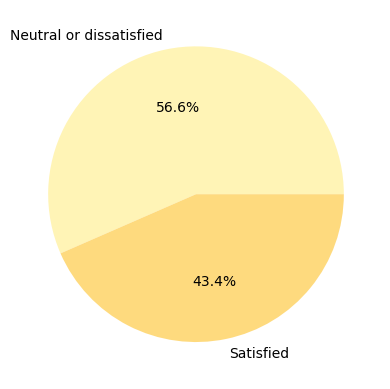

In [168]:
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%');

Poprilično balansiran skup podataka.

In [169]:
listaBrojaRazlicitihVrednostiAtributa = []
for col in df.columns:
    listaBrojaRazlicitihVrednostiAtributa.append(df[col].nunique())

pom = pd.DataFrame({'Kolone': df.columns, 'Broj različitih vrednosti': listaBrojaRazlicitihVrednostiAtributa})
pom

,Kolone,Broj različitih vrednosti
0,id,129880
1,Gender,2
2,Customer Type,2
3,Age,75
4,Type of Travel,2
5,Class,3
6,Flight Distance,3821
7,Inflight wifi service,6
8,Departure/Arrival time convenient,6
9,Ease of Online booking,6


<b>Zaključak je da pojedine kolone iako imaju vrednosti tipa int64 možemo predstaviti kao kategoričke jer imaju mali broj različitih vrednosti.

In [170]:
categorical_indexes = [1, 2, 4, 5] + list(range(7, 21))
#categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df_pomocni = df.copy()
df_pomocni.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')
df_pomocni.dtypes

id                                      int64
Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure Delay in Minutes        

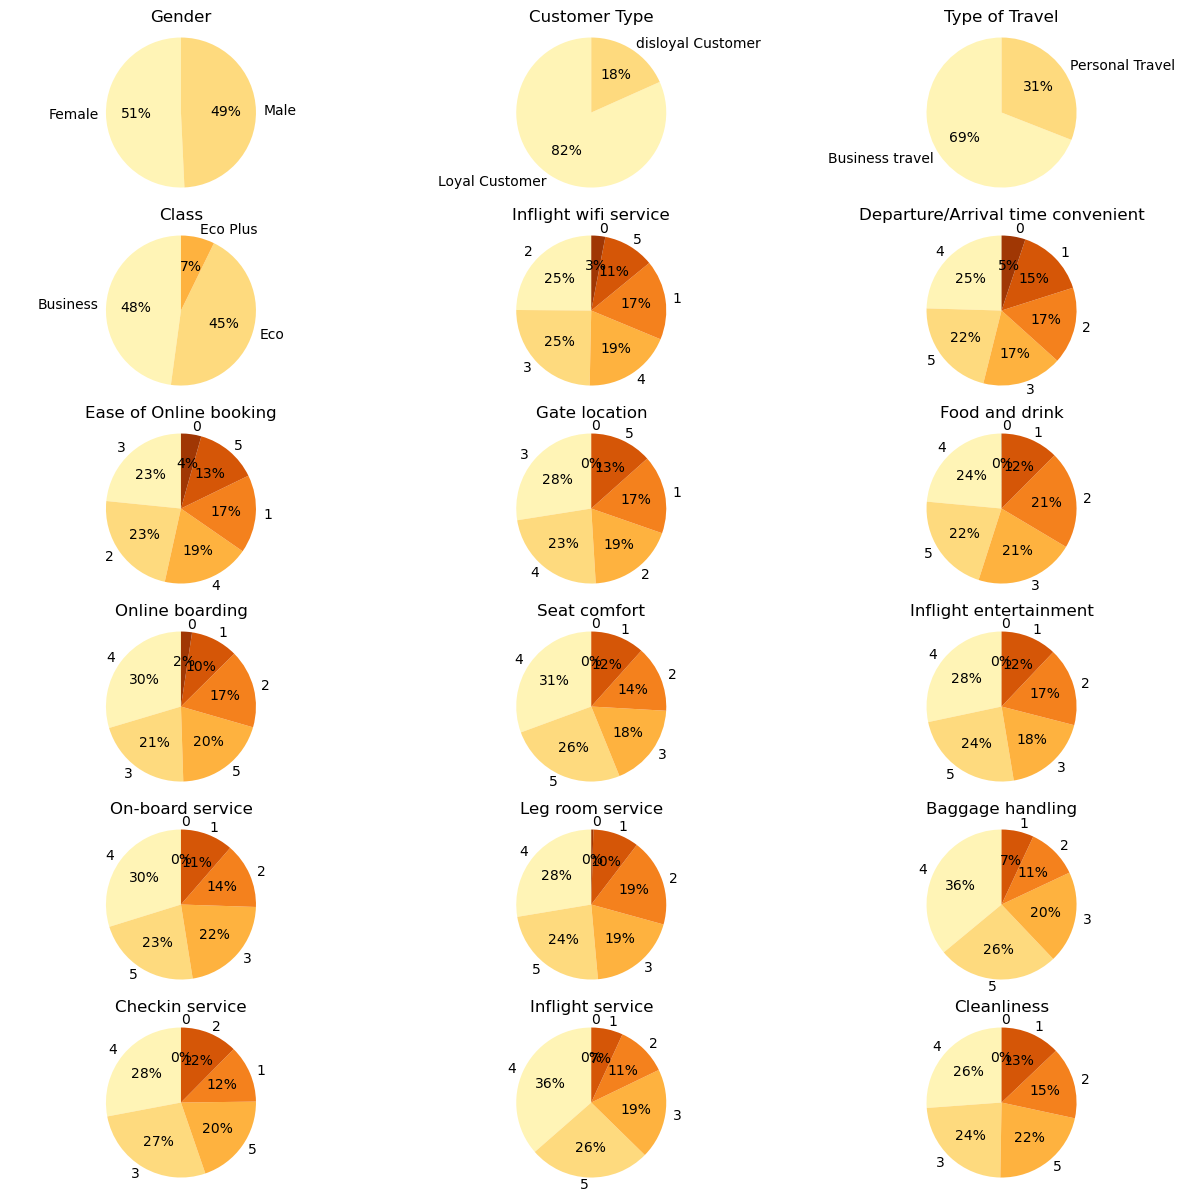

In [171]:
categ = df_pomocni.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (15, 15))
for i, col in enumerate(categ):
    column_values = df_pomocni[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Neki od zaključaka su:

<ul>
    <li>Broj muškaraca i žena u ovom uzorku je otprilike isti</li>
    <li>Velika većina klijenata aviokompanije su klijenti koji ponovo putuju sa ovom aviokompanijom</li>
    <li>Većina naših klijenata je letela iz poslovnih razloga, a ne ličnih</li>
    <li>Oko polovine putnika bilo je u biznis klasi</li>
    <li>Više od 60% putnika je bilo zadovoljno uslugom prevoza prtljaga (ocenjeno 4-5 od 5)</li>
    <li>Više od 50% putnika je bilo udobno u sedištima (ocenjeno 4-5 od 5)</li>
</ul>

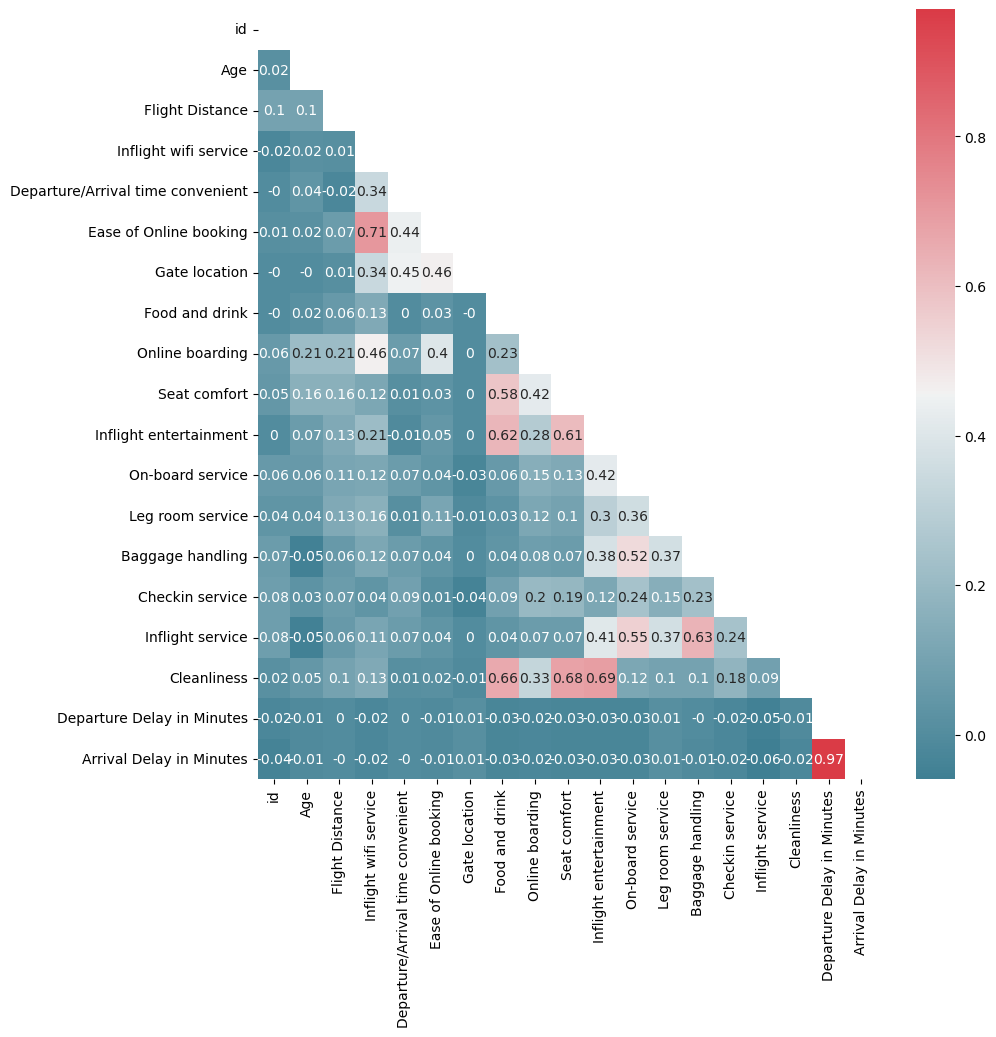

In [172]:
df_corr = df.corr()
df_corr = df_corr.apply(lambda x: round(x, 2))

fig, ax = plt.subplots(figsize=(10, 10))

# Define a custom color map
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(df_corr, dtype=bool))

sns.heatmap(data=df_corr, annot=True,mask=mask, ax=ax, cmap=cmap)
plt.show()

Vidimo da je visoka korelacija između atributa Departure Delay in Minutes i Arrival Dealay in Minutes. Zbog toga izbacujemo jedan od atributa.

Dobijeni rezultati su sasvim logični i mogu se objasniti na sledeći način. Ako je let klijenata avio-kompanije bio odložen za određeno vreme pri polasku, onda će let biti odložen za približno isto vreme pri sletanju (pod uslovom da avion ne ubrza u letu da bi nadoknadio izgubljeno vreme) .

In [173]:
df_reduced = df.drop("Arrival Delay in Minutes", axis = 1)
df_reduced.drop("id",axis=1,inplace=True)
df_reduced.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied


In [174]:
label_encoder = LabelEncoder()
label_encoder.fit(df_reduced["satisfaction"])
df_reduced["satisfaction"] = label_encoder.transform(df_reduced["satisfaction"])

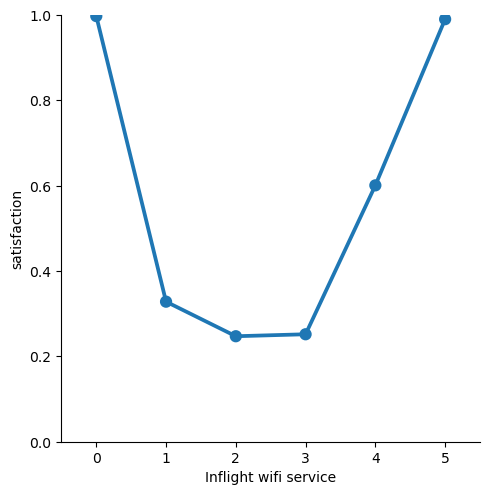

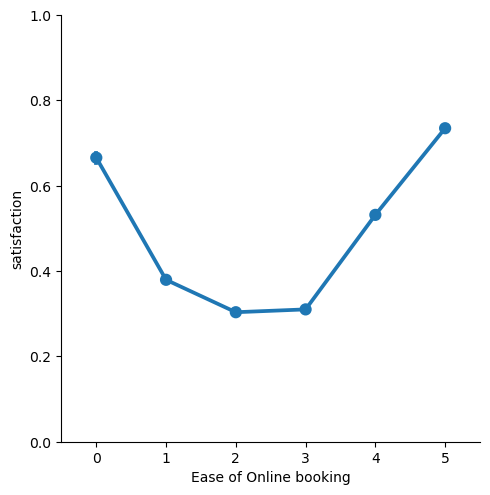

In [175]:
for col in ['Inflight wifi service', 'Ease of Online booking']:
    sns.catplot(x=col, y='satisfaction', data=df_reduced, kind='point')
    plt.ylim(0, 1)

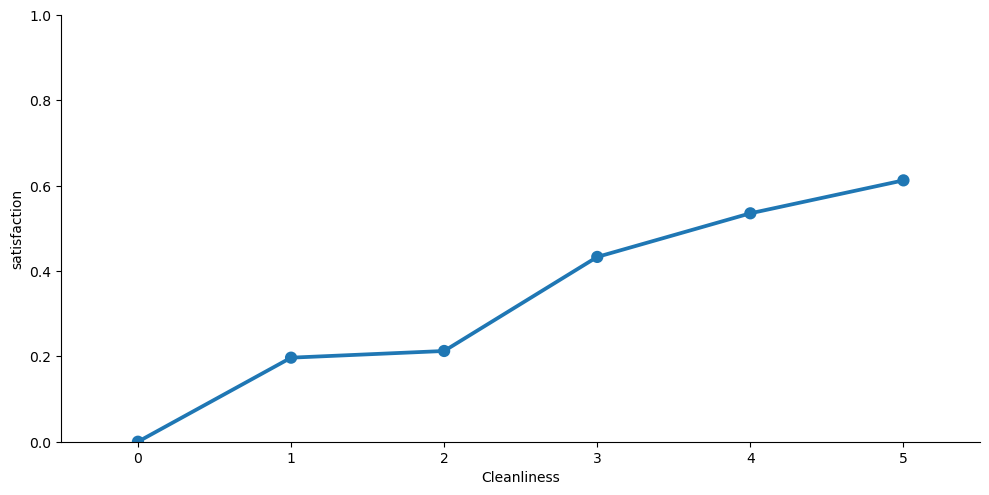

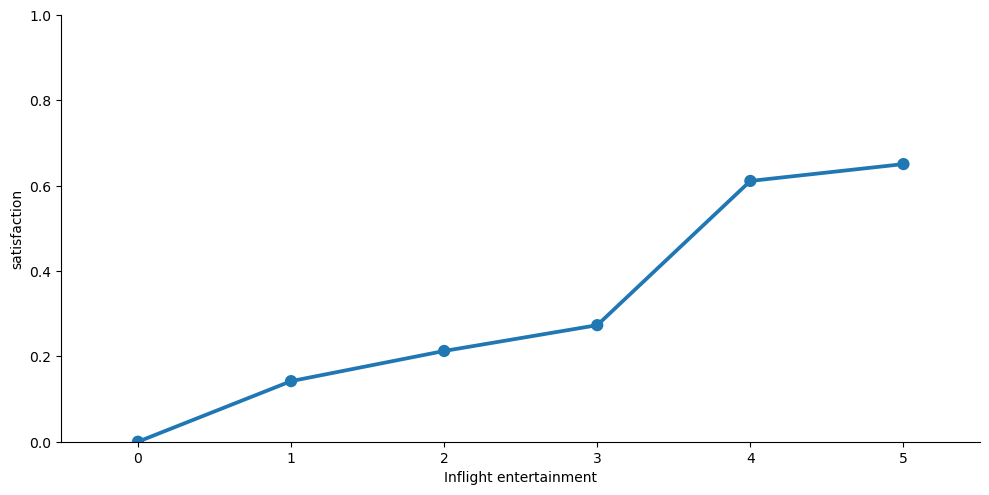

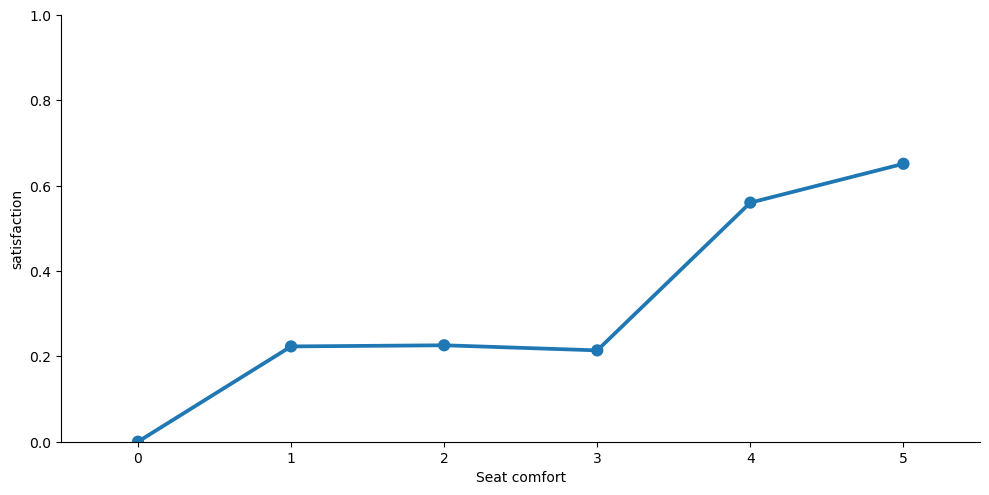

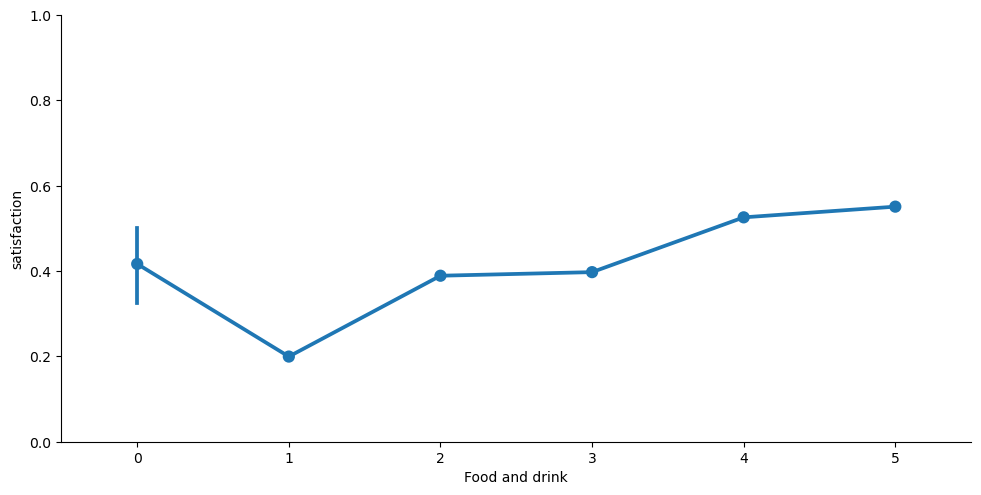

In [176]:
#Cleanliness, Inflight entertainment, Seat comfort and Food and drink had high correlations
for col in ['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']:
    sns.catplot(x=col, y='satisfaction', data=df_reduced, kind='point', aspect=2)
    plt.ylim(0, 1)

<b>Javlja se mogucnost stapanja ovih atributa u jedan koriscenjem PCA algoritma zbog visoke korelacije.

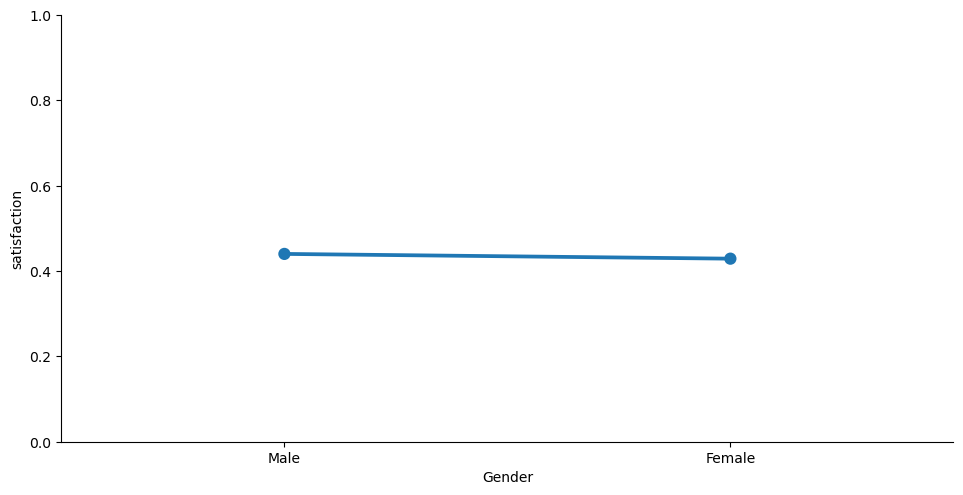

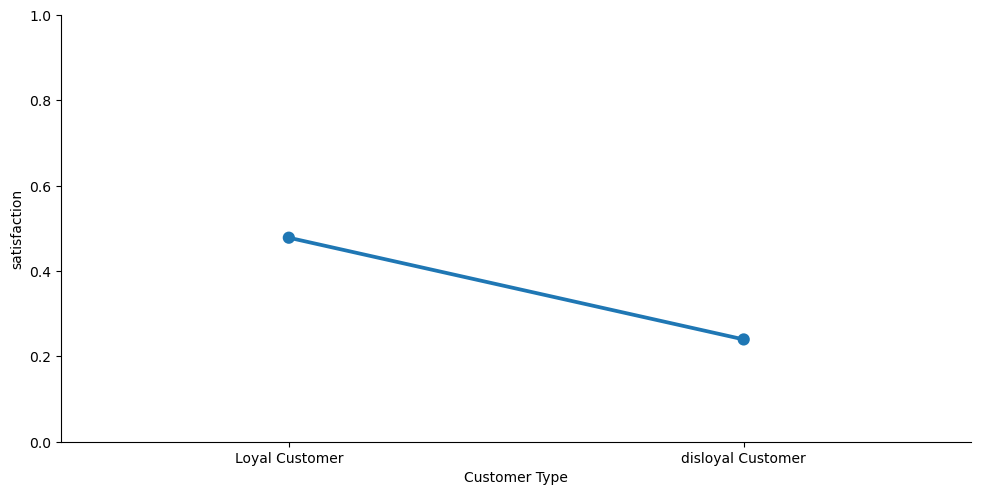

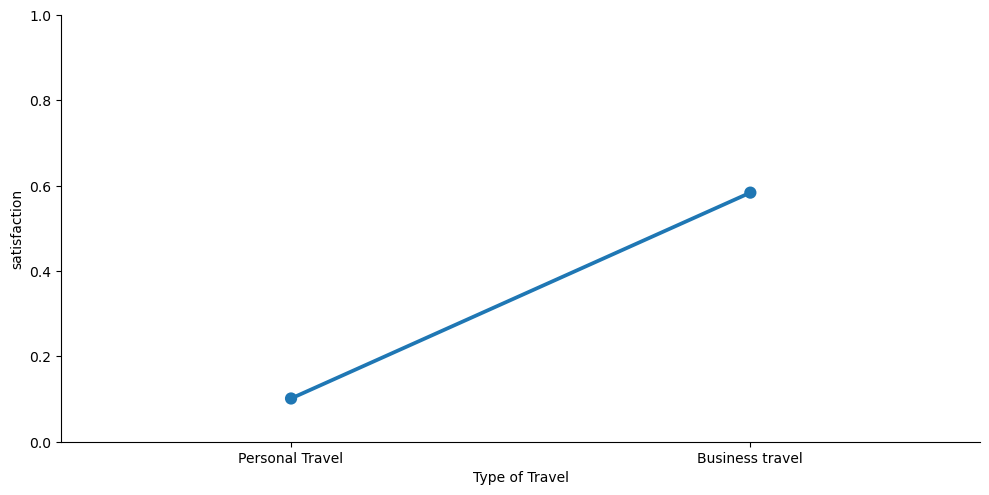

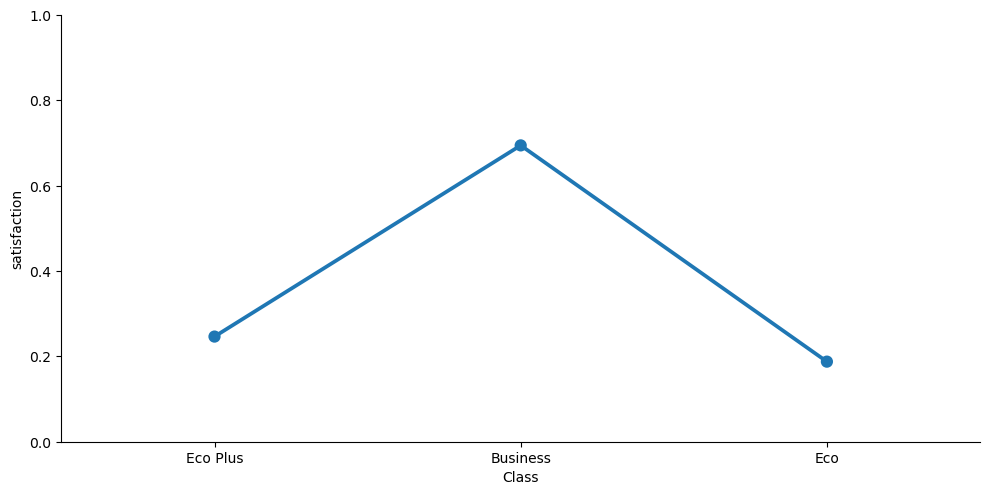

In [177]:
categorical_cols = [col for col in df_reduced.columns if df_reduced[col].dtypes in ['object']]
#Categorical plots for categorical features
for col in categorical_cols:
    sns.catplot(x=col, y='satisfaction', data=df_reduced, kind='point', aspect=2)
    plt.ylim(0, 1)  #Ylim makes the y axis Min->0 and Max->1

**Beleške o kategoričkim vizualizacijama:**
1. Nema razlike u zadovoljstvu muških ili ženskih putnika (Potencijalno izbacivanje ovog atributa kasnije).
2. Lojalni klijenti su bili zadovoljniji od nelojalnih klijenata.
3. Poslovna putovanja su imala veći nivo zadovoljstva od privatnih putovanja.
4. Poslovna klasa je imala veći nivo zadovoljstva od ekonomske i ekonomske plus klase.

In [178]:
df_reduced.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

In [179]:
df_reduced = df_reduced.dropna()

In [180]:
dups = df_reduced.duplicated()
print("Broj duplikata je:", dups.sum())

Broj duplikata je: 0


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Data Encoding and Normalization</h2>
</div>

In [181]:
#Binarne atribute enkodiramo pomocu LabelEncoder-a
df_encoded = df_reduced.copy()
binarni_atributi = ["Gender", "Customer Type", "Type of Travel"]
for label in binarni_atributi:
    label_encoder = LabelEncoder()
    label_encoder.fit(df_reduced[label])
    df_encoded[label] = label_encoder.transform(df_reduced[label])
df_encoded.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,13,1,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,1,1,25,0,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,0,0,26,0,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,0,0,25,0,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,1,0,61,0,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1


In [182]:
#one hot encode za ternarni atribut "Class"
df_encoded = pd.get_dummies(df_encoded, columns=['Class'])

In [183]:
df_encoded.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,0,13,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0,0,0,1
1,1,1,25,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0,1,0,0
2,0,0,26,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1,1,0,0
3,0,0,25,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,1,0,0
4,1,0,61,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,1,0,0


In [184]:
df_normalized = df_encoded.copy()
df_standardized = df_encoded.drop("satisfaction", axis=1).copy()

In [185]:
scaler = MinMaxScaler()
scalerStd = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_normalized), columns = df_normalized.columns)
label = df_encoded["satisfaction"]
df_standardized = pd.DataFrame(scalerStd.fit_transform(df_standardized), columns = df_standardized.columns)
df_standardized["satisfaction"] = label

In [186]:
df_normalized.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,0.076923,1.0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.0,0.0,0.0,1.0
1,1.0,1.0,0.230769,0.0,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.0,1.0,0.0,0.0
2,0.0,0.0,0.243590,0.0,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,1.0,1.0,0.0,0.0
3,0.0,0.0,0.230769,0.0,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.0,1.0,0.0,0.0
4,1.0,0.0,0.692308,0.0,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,1.0,1.0,0.0,0.0


In [187]:
df_standardized.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,satisfaction
0,1.014878,-0.473422,-1.747961,1.493951,-0.732184,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,0.270187,-0.958070,-0.902608,3.577831,0
1,1.014878,2.112281,-0.954274,-0.669366,-0.957760,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.360214,1.043766,-0.902608,-0.279499,0
2,-0.985340,-0.473422,-0.888133,-0.669366,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.386481,1.043766,-0.902608,-0.279499,1
3,-0.985340,-0.473422,-0.954274,-0.669366,-0.629924,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,-0.097547,1.043766,-0.902608,-0.279499,0
4,1.014878,-0.473422,1.426788,-0.669366,-0.978814,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.386481,1.043766,-0.902608,-0.279499,1


In [188]:
#Pokusaj i sa visoko korelisanim atributima
#Stapanje atributa koriscenjem PCA
#Novi pokusaj

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Train-Test Split bez PCA (Normalizovani podaci)</h2>
</div>

In [189]:
#Odvajanje ulaznih i izlaznih atributa
X = df_normalized.drop("satisfaction", axis=1)

y = df_normalized["satisfaction"]

X.shape, y.shape

((129880, 23), (129880,))

In [190]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1.0,0.0,0.076923,1.0,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.0,0.0,1.0
1,1.0,1.0,0.230769,0.0,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,1.0,0.0,0.0
2,0.0,0.0,0.243590,0.0,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,1.0,0.0,0.0
3,0.0,0.0,0.230769,0.0,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,1.0,0.0,0.0
4,1.0,0.0,0.692308,0.0,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,1.0,0.0,0.0


In [191]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103904, 23), (25976, 23), (103904,), (25976,))

In [193]:
X_train_n = X_train.copy()
X_test_n = X_test.copy()
y_train_n = y_train.copy()
y_test_n = y_test.copy()

In [194]:
testing = pd.DataFrame(columns=["Algoritam", "Normalizacija/Standardizacija", "Accuracy"])
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Inicijalna ANN bez PCA (Normalizovani podaci)</h2>
</div>`

In [195]:
model_n = Sequential()
model_n.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_n.add(Dense(256, activation='relu'))
model_n.add(Dense(256, activation='relu'))
model_n.add(Dense(128, activation='relu'))
model_n.add(Dense(1, activation='sigmoid')) 

model_n.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [196]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [197]:
NN_Classifier1 = model_n.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 2s - loss: 0.2826 - accuracy: 0.8819 - val_loss: 0.1700 - val_accuracy: 0.9327 - 2s/epoch - 19ms/step
Epoch 2/1000
104/104 - 1s - loss: 0.1562 - accuracy: 0.9365 - val_loss: 0.1407 - val_accuracy: 0.9447 - 1s/epoch - 11ms/step
Epoch 3/1000
104/104 - 1s - loss: 0.1322 - accuracy: 0.9452 - val_loss: 0.1233 - val_accuracy: 0.9500 - 1s/epoch - 11ms/step
Epoch 4/1000
104/104 - 1s - loss: 0.1207 - accuracy: 0.9490 - val_loss: 0.1123 - val_accuracy: 0.9536 - 1s/epoch - 11ms/step
Epoch 5/1000
104/104 - 1s - loss: 0.1124 - accuracy: 0.9524 - val_loss: 0.1117 - val_accuracy: 0.9553 - 1s/epoch - 11ms/step
Epoch 6/1000
104/104 - 1s - loss: 0.1075 - accuracy: 0.9548 - val_loss: 0.1055 - val_accuracy: 0.9559 - 1s/epoch - 11ms/step
Epoch 7/1000
104/104 - 1s - loss: 0.1032 - accuracy: 0.9562 - val_loss: 0.1106 - val_accuracy: 0.9535 - 1s/epoch - 11ms/step
Epoch 8/1000
104/104 - 1s - loss: 0.1041 - accuracy: 0.9554 - val_loss: 0.1001 - val_accuracy: 0.9577 - 1s/epoch - 11ms/step


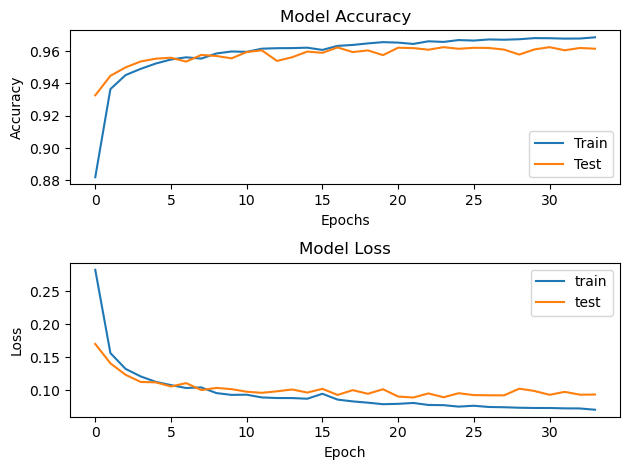

In [198]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier1.history['accuracy'])
plt.plot(NN_Classifier1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier1.history['loss'])
plt.plot(NN_Classifier1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

Primecujemo da dolazi do overfittinga modela. Razlog za ovo je veliki broj neurona koriscenih bez Dropout tehnike. U nastavku dodajemo Dropout za pojedine slojeve.

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  96.25%
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14714
         1.0       0.97      0.94      0.96     11262

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



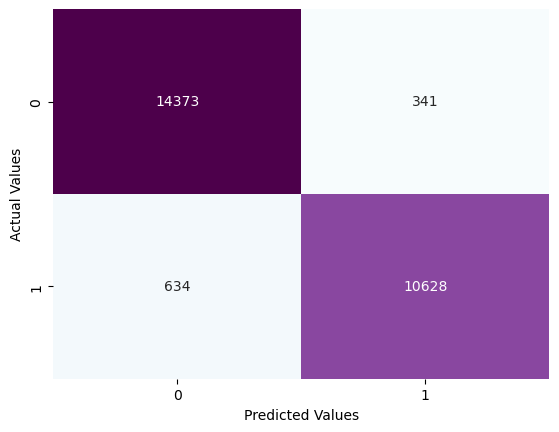

In [199]:
y_pred=(model_n.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, bez Dropout", "Normalizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [200]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
ANN bez PCA sa korišćenjem Dropout-a (Normalizovani podaci)</h2>
</div>`

In [201]:
model_dp_n = Sequential()
model_dp_n.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_dp_n.add(Dropout(0.3))
model_dp_n.add(Dense(256, activation='relu'))
model_dp_n.add(Dense(256, activation='relu'))
model_dp_n.add(Dropout(0.3))
model_dp_n.add(Dense(128, activation='relu'))
model_dp_n.add(Dense(1, activation='sigmoid')) 

model_dp_n.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [202]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [203]:
NN_Classifier_DP = model_dp_n.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 3s - loss: 0.3152 - accuracy: 0.8701 - val_loss: 0.1817 - val_accuracy: 0.9304 - 3s/epoch - 27ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1809 - accuracy: 0.9264 - val_loss: 0.1397 - val_accuracy: 0.9441 - 2s/epoch - 16ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1488 - accuracy: 0.9394 - val_loss: 0.1246 - val_accuracy: 0.9473 - 2s/epoch - 16ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1340 - accuracy: 0.9443 - val_loss: 0.1213 - val_accuracy: 0.9496 - 2s/epoch - 16ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1239 - accuracy: 0.9485 - val_loss: 0.1078 - val_accuracy: 0.9536 - 2s/epoch - 16ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1156 - accuracy: 0.9507 - val_loss: 0.1077 - val_accuracy: 0.9548 - 2s/epoch - 16ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1102 - accuracy: 0.9528 - val_loss: 0.1027 - val_accuracy: 0.9570 - 2s/epoch - 16ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.1082 - accuracy: 0.9538 - val_loss: 0.1006 - val_accuracy: 0.9576 - 2s/epoch - 16ms/step


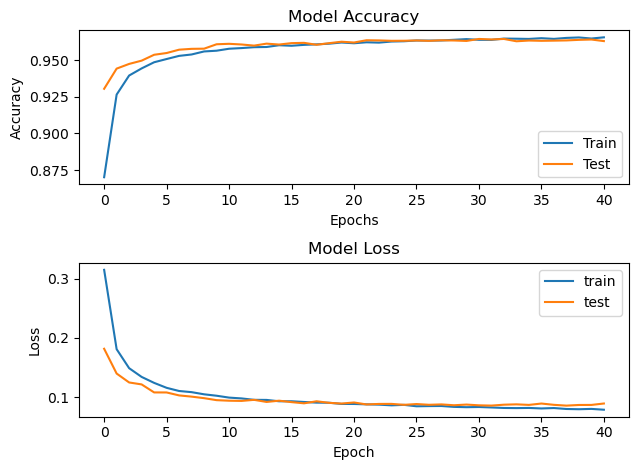

In [204]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP.history['accuracy'])
plt.plot(NN_Classifier_DP.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP.history['loss'])
plt.plot(NN_Classifier_DP.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

Primećujemo poboljšanje nakon uvođenja Dropout-a.

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  96.44%
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     14714
         1.0       0.97      0.94      0.96     11262

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



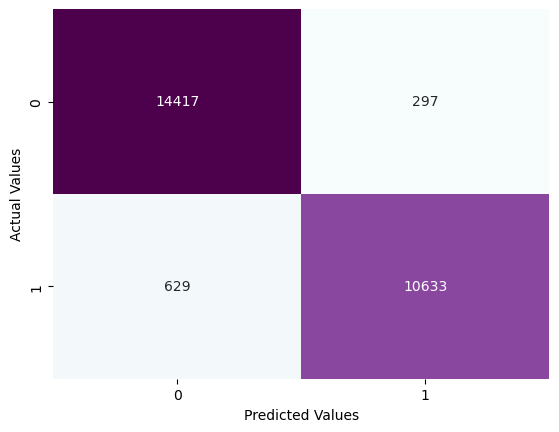

In [205]:
y_pred=(model_dp_n.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout", "Normalizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [206]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
1,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Train-Test Split bez PCA (Standardizovani podaci)</h2>
</div>

In [207]:
#Odvajanje ulaznih i izlaznih atributa
X = df_standardized.drop("satisfaction", axis=1)

y = df_standardized["satisfaction"]

X.shape, y.shape

((129880, 23), (129880,))

In [208]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1.014878,-0.473422,-1.747961,1.493951,-0.732184,0.204090,0.617265,0.173445,-1.546267,1.349867,-0.187037,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,0.270187,-0.958070,-0.902608,3.577831
1,1.014878,2.112281,-0.954274,-0.669366,-0.957760,0.204090,-0.692719,0.173445,0.018048,-1.657814,-0.187037,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.360214,1.043766,-0.902608,-0.279499
2,-0.985340,-0.473422,-0.888133,-0.669366,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,1.349867,1.293662,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.386481,1.043766,-0.902608,-0.279499
3,-0.985340,-0.473422,-0.954274,-0.669366,-0.629924,-0.548166,1.272257,1.600249,1.582364,-0.905894,-0.927386,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,-0.097547,1.043766,-0.902608,-0.279499
4,1.014878,-0.473422,1.426788,-0.669366,-0.978814,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.386481,1.043766,-0.902608,-0.279499


In [209]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103904, 23), (25976, 23), (103904,), (25976,))

In [211]:
X_train_s = X_train
X_test_s = X_test
y_train_s = y_train
y_test_s = y_test

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Inicijalna ANN bez PCA (Standardizovani podaci)</h2>
</div>`

In [212]:
model_s = Sequential()
model_s.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_s.add(Dense(256, activation='relu'))
model_s.add(Dense(256, activation='relu'))
model_s.add(Dense(128, activation='relu'))
model_s.add(Dense(1, activation='sigmoid'))

model_s.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [213]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [214]:
NN_Classifier2 = model_s.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 2s - loss: 0.2164 - accuracy: 0.9137 - val_loss: 0.1311 - val_accuracy: 0.9468 - 2s/epoch - 19ms/step
Epoch 2/1000
104/104 - 1s - loss: 0.1226 - accuracy: 0.9489 - val_loss: 0.1068 - val_accuracy: 0.9559 - 1s/epoch - 11ms/step
Epoch 3/1000
104/104 - 1s - loss: 0.1056 - accuracy: 0.9553 - val_loss: 0.1031 - val_accuracy: 0.9579 - 1s/epoch - 11ms/step
Epoch 4/1000
104/104 - 1s - loss: 0.0942 - accuracy: 0.9601 - val_loss: 0.0931 - val_accuracy: 0.9624 - 1s/epoch - 11ms/step
Epoch 5/1000
104/104 - 1s - loss: 0.0905 - accuracy: 0.9612 - val_loss: 0.0938 - val_accuracy: 0.9614 - 1s/epoch - 11ms/step
Epoch 6/1000
104/104 - 1s - loss: 0.0851 - accuracy: 0.9633 - val_loss: 0.0894 - val_accuracy: 0.9634 - 1s/epoch - 11ms/step
Epoch 7/1000
104/104 - 1s - loss: 0.0815 - accuracy: 0.9645 - val_loss: 0.0907 - val_accuracy: 0.9632 - 1s/epoch - 11ms/step
Epoch 8/1000
104/104 - 1s - loss: 0.0787 - accuracy: 0.9657 - val_loss: 0.0909 - val_accuracy: 0.9630 - 1s/epoch - 11ms/step


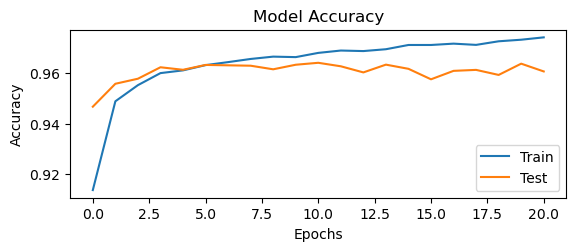

In [215]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier2.history['accuracy'])
plt.plot(NN_Classifier2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

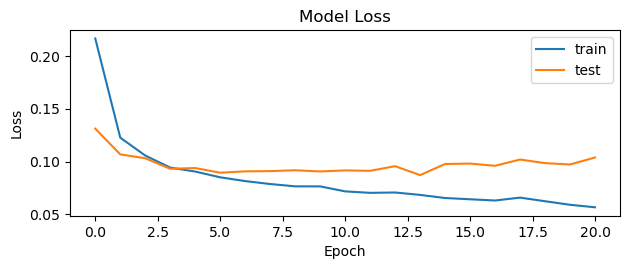

In [216]:
plt.subplot(2,1,2)
plt.plot(NN_Classifier2.history['loss'])
plt.plot(NN_Classifier2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

Primećujemo da je prisutan overfitting.

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  96.42%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14664
           1       0.98      0.94      0.96     11312

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



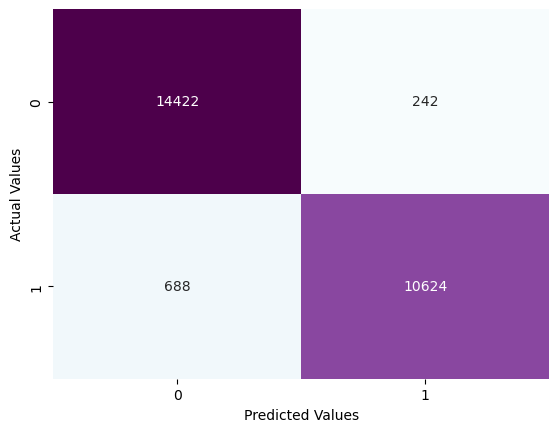

In [217]:
y_pred=(model_s.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))

testing.loc[-1] = ["ANN bez PCA, bez Dropout", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [218]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
1,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
2,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
ANN bez PCA sa korišćenjem Dropout-a (Standardizovani podaci)</h2>
</div>`

In [219]:
model_dp_s = Sequential()
model_dp_s.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_dp_s.add(Dropout(0.3))
model_dp_s.add(Dense(256, activation='relu'))
model_dp_s.add(Dense(256, activation='relu'))
model_dp_s.add(Dropout(0.3))
model_dp_s.add(Dense(128, activation='relu'))
model_dp_s.add(Dense(1, activation='sigmoid')) 

model_dp_s.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [220]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [221]:
NN_Classifier_DP_S = model_dp_s.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 3s - loss: 0.2430 - accuracy: 0.9018 - val_loss: 0.1496 - val_accuracy: 0.9425 - 3s/epoch - 25ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1501 - accuracy: 0.9386 - val_loss: 0.1122 - val_accuracy: 0.9547 - 2s/epoch - 16ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1243 - accuracy: 0.9490 - val_loss: 0.1011 - val_accuracy: 0.9581 - 2s/epoch - 16ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1115 - accuracy: 0.9532 - val_loss: 0.0928 - val_accuracy: 0.9605 - 2s/epoch - 16ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1038 - accuracy: 0.9558 - val_loss: 0.0904 - val_accuracy: 0.9629 - 2s/epoch - 16ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.0992 - accuracy: 0.9572 - val_loss: 0.0874 - val_accuracy: 0.9633 - 2s/epoch - 16ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.0958 - accuracy: 0.9590 - val_loss: 0.0859 - val_accuracy: 0.9640 - 2s/epoch - 16ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.0935 - accuracy: 0.9597 - val_loss: 0.0849 - val_accuracy: 0.9640 - 2s/epoch - 16ms/step


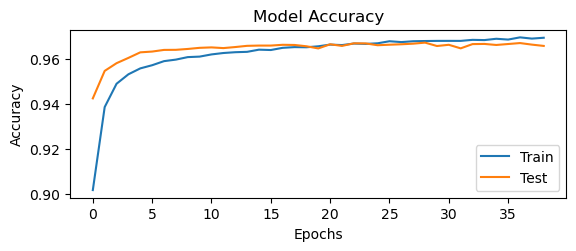

In [222]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP_S.history['accuracy'])
plt.plot(NN_Classifier_DP_S.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

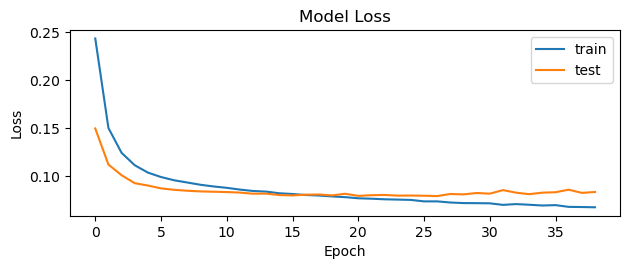

In [223]:
plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP_S.history['loss'])
plt.plot(NN_Classifier_DP_S.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  96.72%
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14664
           1       0.98      0.95      0.96     11312

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.97     25976
weighted avg       0.97      0.97      0.97     25976



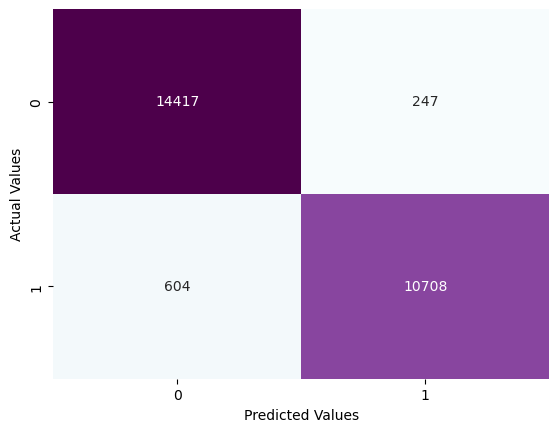

In [224]:
y_pred=(model_dp_s.predict(X_test) > 0.5).astype(int)   
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [225]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
1,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
2,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
3,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


Primećujemo da se accuracy poboljšao.

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Redukcija atributa</h2>
</div>`

<b>Sledi stapanje visokokorelisanih atributa u jedan koriscenjem PCA algoritma.

In [226]:
df_standardized_pca = df_standardized.copy()
df_normalized_pca = df_normalized.copy()

In [227]:
pca1 = PCA(n_components=1)
df_standardized_pca['PCA1'] = pca1.fit_transform(df_standardized[['Inflight wifi service', 'Ease of Online booking']])
pca2 = PCA(n_components=1)
df_normalized_pca['PCA1'] = pca2.fit_transform(df_normalized_pca[['Inflight wifi service', 'Ease of Online booking']])

In [228]:
pca3 = PCA(n_components=2)
pca_components = pca3.fit_transform(df_standardized[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
df_standardized_pca['PCA2'] = pca_components[:, 0]
df_standardized_pca['PCA3'] = pca_components[:, 1]

pca4 = PCA(n_components=2)
pca_components = pca4.fit_transform(df_normalized_pca[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
df_normalized_pca['PCA2'] = pca_components[:, 0]
df_normalized_pca['PCA3'] = pca_components[:, 1]

In [229]:
print(pca1.explained_variance_ratio_)
print(pca2.explained_variance_ratio_)
print(pca3.explained_variance_ratio_)
print(pca4.explained_variance_ratio_)

[0.85740342]
[0.85788323]
[0.73061664 0.10661999]
[0.73038164 0.10666234]


In [230]:
df_standardized_pca.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                 'Ease of Online booking'], axis=1, inplace=True)

df_normalized_pca.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                 'Ease of Online booking'], axis=1, inplace=True)

In [231]:
#Brisemo "Gender" zato sto je isti procenat satisfakcije i za zene i za muskarce -> Nema skoro nikakvog uticaja na output.
df_standardized_pca.drop("Gender", axis=1, inplace=True)
df_normalized_pca.drop("Gender", axis=1, inplace=True)

In [232]:
df_standardized_pca.head()

,Customer Type,Age,Type of Travel,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,satisfaction,PCA1,PCA2,PCA3
0,-0.473422,-1.747961,1.493951,-0.732184,0.617265,-1.546267,-0.187037,0.479357,-0.266574,0.311762,0.547894,1.153946,0.270187,-0.958070,-0.902608,3.577831,0,-0.266958,-2.532978,-0.117731
1,2.112281,-0.954274,-0.669366,-0.957760,-0.692719,0.018048,-0.187037,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-0.360214,1.043766,-0.902608,-0.279499,0,-0.266958,3.506909,-0.121778
2,-0.473422,-0.888133,-0.669366,-0.048440,-0.692719,-0.764109,1.293662,0.479357,-0.266574,0.311762,0.547894,0.304086,-0.386481,1.043766,-0.902608,-0.279499,1,0.769419,-2.532978,-0.117731
3,-0.473422,-0.954274,-0.669366,-0.629924,1.272257,1.582364,-0.927386,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.097547,1.043766,-0.902608,-0.279499,0,-0.743936,1.996938,-0.120767
4,-0.473422,1.426788,-0.669366,-0.978814,-0.037727,0.018048,1.293662,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.386481,1.043766,-0.902608,-0.279499,1,-0.266958,-0.621948,0.439072


In [233]:
df_normalized_pca.head()

,Customer Type,Age,Type of Travel,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus,PCA1,PCA2,PCA3
0,0.0,0.076923,1.0,0.086632,0.8,0.2,0.6,0.8,0.6,0.75,0.8,1.0,0.015704,0.0,0.0,0.0,1.0,-0.072554,-0.670912,-0.030862
1,1.0,0.230769,0.0,0.041195,0.4,0.6,0.6,0.2,1.0,0.50,0.2,0.8,0.000628,0.0,1.0,0.0,0.0,-0.072554,0.928655,-0.033013
2,0.0,0.243590,0.0,0.224354,0.4,0.4,1.0,0.8,0.6,0.75,0.8,0.8,0.000000,1.0,1.0,0.0,0.0,0.210095,-0.670912,-0.030862
3,0.0,0.230769,0.0,0.107229,1.0,1.0,0.4,0.4,1.0,0.50,0.2,0.8,0.006910,0.0,1.0,0.0,0.0,-0.229591,0.528763,-0.032475
4,0.0,0.692308,0.0,0.036955,0.6,0.6,1.0,0.6,0.8,0.75,0.6,0.6,0.000000,1.0,1.0,0.0,0.0,-0.072554,-0.164066,0.108461


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Train-Test Split sa PCA (Normalizovani podaci)</h2>
</div>

In [234]:
#Odvajanje ulaznih i izlaznih atributa
X = df_normalized_pca.drop("satisfaction", axis=1)

y = df_normalized_pca["satisfaction"]

X.shape, y.shape

((129880, 19), (129880,))

In [235]:
X.head()

,Customer Type,Age,Type of Travel,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,PCA1,PCA2,PCA3
0,0.0,0.076923,1.0,0.086632,0.8,0.2,0.6,0.8,0.6,0.75,0.8,1.0,0.015704,0.0,0.0,1.0,-0.072554,-0.670912,-0.030862
1,1.0,0.230769,0.0,0.041195,0.4,0.6,0.6,0.2,1.0,0.50,0.2,0.8,0.000628,1.0,0.0,0.0,-0.072554,0.928655,-0.033013
2,0.0,0.243590,0.0,0.224354,0.4,0.4,1.0,0.8,0.6,0.75,0.8,0.8,0.000000,1.0,0.0,0.0,0.210095,-0.670912,-0.030862
3,0.0,0.230769,0.0,0.107229,1.0,1.0,0.4,0.4,1.0,0.50,0.2,0.8,0.006910,1.0,0.0,0.0,-0.229591,0.528763,-0.032475
4,0.0,0.692308,0.0,0.036955,0.6,0.6,1.0,0.6,0.8,0.75,0.6,0.6,0.000000,1.0,0.0,0.0,-0.072554,-0.164066,0.108461


In [236]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103904, 19), (25976, 19), (103904,), (25976,))

In [238]:
X_train_n_pca = X_train.copy()
X_test_n_pca = X_test.copy()
y_train_n_pca = y_train.copy()
y_test_n_pca = y_test.copy()

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
ANN sa PCA sa korišćenjem Dropout-a (Normalizovani podaci)</h2>
</div>`

In [239]:
model_dp_n_pca = Sequential()
model_dp_n_pca.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_dp_n_pca.add(Dropout(0.3))
model_dp_n_pca.add(Dense(256, activation='relu'))
model_dp_n_pca.add(Dense(256, activation='relu'))
model_dp_n_pca.add(Dropout(0.3))
model_dp_n_pca.add(Dense(128, activation='relu'))
model_dp_n_pca.add(Dense(1, activation='sigmoid')) 

model_dp_n_pca.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [240]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [241]:
NN_Classifier_DP_n_pca = model_dp_n_pca.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 3s - loss: 0.3061 - accuracy: 0.8739 - val_loss: 0.1904 - val_accuracy: 0.9242 - 3s/epoch - 25ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1932 - accuracy: 0.9229 - val_loss: 0.1688 - val_accuracy: 0.9317 - 2s/epoch - 16ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1722 - accuracy: 0.9301 - val_loss: 0.1552 - val_accuracy: 0.9372 - 2s/epoch - 16ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1599 - accuracy: 0.9363 - val_loss: 0.1430 - val_accuracy: 0.9404 - 2s/epoch - 16ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1509 - accuracy: 0.9390 - val_loss: 0.1357 - val_accuracy: 0.9437 - 2s/epoch - 16ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1442 - accuracy: 0.9417 - val_loss: 0.1288 - val_accuracy: 0.9453 - 2s/epoch - 16ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1385 - accuracy: 0.9434 - val_loss: 0.1284 - val_accuracy: 0.9469 - 2s/epoch - 16ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.1344 - accuracy: 0.9454 - val_loss: 0.1222 - val_accuracy: 0.9498 - 2s/epoch - 16ms/step


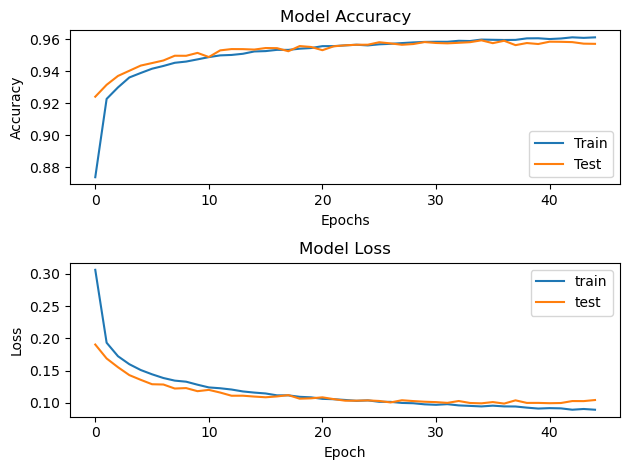

In [242]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP_n_pca.history['accuracy'])
plt.plot(NN_Classifier_DP_n_pca.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP_n_pca.history['loss'])
plt.plot(NN_Classifier_DP_n_pca.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  95.95%
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     14662
         1.0       0.97      0.94      0.95     11314

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



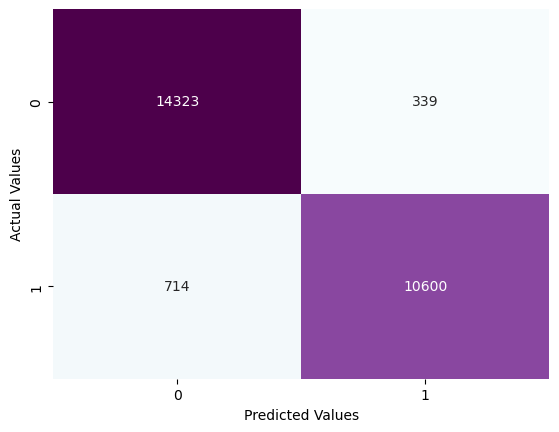

In [243]:
y_pred=(model_dp_n_pca.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN sa PCA, sa Dropout", "Normalizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [244]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN sa PCA, sa Dropout",Normalizacija,95.95%
1,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
2,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
3,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
4,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Train-Test Split sa PCA (Standardizovani podaci)</h2>
</div>

In [245]:
#Odvajanje ulaznih i izlaznih atributa
X = df_standardized_pca.drop("satisfaction", axis=1)

y = df_standardized_pca["satisfaction"]

X.shape, y.shape

((129880, 19), (129880,))

In [246]:
X.head()

,Customer Type,Age,Type of Travel,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,PCA1,PCA2,PCA3
0,-0.473422,-1.747961,1.493951,-0.732184,0.617265,-1.546267,-0.187037,0.479357,-0.266574,0.311762,0.547894,1.153946,0.270187,-0.958070,-0.902608,3.577831,-0.266958,-2.532978,-0.117731
1,2.112281,-0.954274,-0.669366,-0.957760,-0.692719,0.018048,-0.187037,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-0.360214,1.043766,-0.902608,-0.279499,-0.266958,3.506909,-0.121778
2,-0.473422,-0.888133,-0.669366,-0.048440,-0.692719,-0.764109,1.293662,0.479357,-0.266574,0.311762,0.547894,0.304086,-0.386481,1.043766,-0.902608,-0.279499,0.769419,-2.532978,-0.117731
3,-0.473422,-0.954274,-0.669366,-0.629924,1.272257,1.582364,-0.927386,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.097547,1.043766,-0.902608,-0.279499,-0.743936,1.996938,-0.120767
4,-0.473422,1.426788,-0.669366,-0.978814,-0.037727,0.018048,1.293662,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.386481,1.043766,-0.902608,-0.279499,-0.266958,-0.621948,0.439072


In [247]:
cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 1)

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103904, 19), (25976, 19), (103904,), (25976,))

In [249]:
X_train_s_pca = X_train.copy()
X_test_s_pca = X_test.copy()
y_train_s_pca = y_train.copy()
y_test_s_pca = y_test.copy()

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
ANN sa PCA sa korišćenjem Dropout-a (Standardizovani podaci)</h2>
</div>`

In [250]:
model_dp_s_pca = Sequential()
model_dp_s_pca.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_dp_s_pca.add(Dropout(0.42))
model_dp_s_pca.add(Dense(256, activation='relu'))
model_dp_s_pca.add(Dense(256, activation='relu'))
model_dp_s_pca.add(Dropout(0.42))
model_dp_s_pca.add(Dense(128, activation='relu'))
model_dp_s_pca.add(Dense(1, activation='sigmoid')) 

model_dp_s_pca.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [251]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [252]:
NN_Classifier_DP_s_pca = model_dp_s_pca.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 3s - loss: 0.2687 - accuracy: 0.8929 - val_loss: 0.1750 - val_accuracy: 0.9309 - 3s/epoch - 24ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1809 - accuracy: 0.9272 - val_loss: 0.1479 - val_accuracy: 0.9396 - 2s/epoch - 16ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1596 - accuracy: 0.9359 - val_loss: 0.1348 - val_accuracy: 0.9454 - 2s/epoch - 15ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1459 - accuracy: 0.9408 - val_loss: 0.1248 - val_accuracy: 0.9478 - 2s/epoch - 16ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1360 - accuracy: 0.9453 - val_loss: 0.1192 - val_accuracy: 0.9500 - 2s/epoch - 15ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1311 - accuracy: 0.9468 - val_loss: 0.1169 - val_accuracy: 0.9507 - 2s/epoch - 16ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1263 - accuracy: 0.9488 - val_loss: 0.1146 - val_accuracy: 0.9524 - 2s/epoch - 16ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.1224 - accuracy: 0.9500 - val_loss: 0.1113 - val_accuracy: 0.9536 - 2s/epoch - 16ms/step


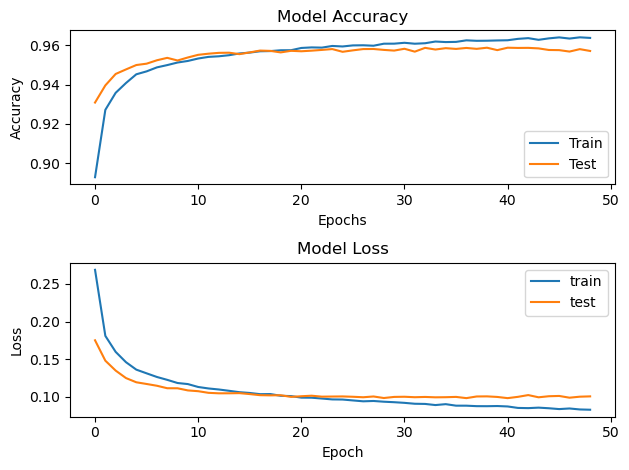

In [253]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP_s_pca.history['accuracy'])
plt.plot(NN_Classifier_DP_s_pca.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP_s_pca.history['loss'])
plt.plot(NN_Classifier_DP_s_pca.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  95.88%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14620
           1       0.97      0.93      0.95     11356

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



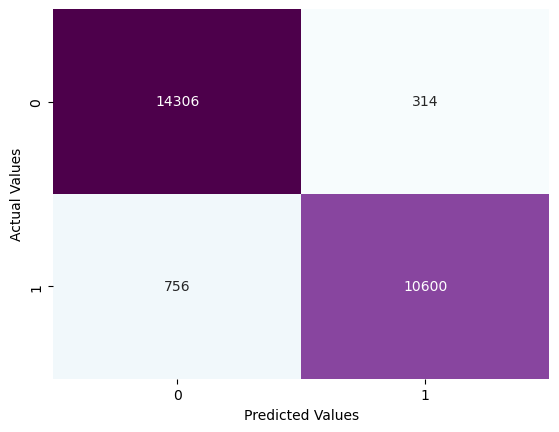

In [254]:
y_pred=(model_dp_s_pca.predict(X_test) > 0.5).astype(int)
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN sa PCA, sa Dropout", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [255]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN sa PCA, sa Dropout",Standardizacija,95.88%
1,"ANN sa PCA, sa Dropout",Normalizacija,95.95%
2,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
3,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
4,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
5,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Custom Loss function</h2>
</div>`

In [256]:
def custom_loss_function(y_true, y_pred):
    y_true = K.cast(y_true, 'float32')
    y_pred = K.clip(y_pred, K.epsilon(), 1-K.epsilon())
    return -K.mean(y_true * K.log(y_pred) + (1 - y_true) * K.log(1 - y_pred))

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Najbolji model sa custom loss funkcijom</h2>
</div>`

In [257]:
model_dp_sp_clf = Sequential()
model_dp_sp_clf.add(Dense(512, activation='relu', input_shape=(X_train_s.shape[1],)))
model_dp_sp_clf.add(Dropout(0.3))
model_dp_sp_clf.add(Dense(256, activation='relu'))
model_dp_sp_clf.add(Dense(256, activation='relu'))
model_dp_sp_clf.add(Dropout(0.3))
model_dp_sp_clf.add(Dense(128, activation='relu'))
model_dp_sp_clf.add(Dense(1, activation='sigmoid')) 

In [258]:
model_dp_sp_clf.compile(loss=custom_loss_function,
              optimizer=Adam(),
              metrics=['accuracy'])

In [259]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [260]:
NN_Classifier_DP_S_CUSTOMLOSS = model_dp_sp_clf.fit(X_train_s, y_train_s,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test_s, y_test_s))

Epoch 1/1000
104/104 - 3s - loss: 0.2486 - accuracy: 0.9001 - val_loss: 0.1443 - val_accuracy: 0.9419 - 3s/epoch - 25ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1500 - accuracy: 0.9383 - val_loss: 0.1103 - val_accuracy: 0.9544 - 2s/epoch - 16ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1241 - accuracy: 0.9483 - val_loss: 0.1013 - val_accuracy: 0.9565 - 2s/epoch - 16ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1130 - accuracy: 0.9531 - val_loss: 0.0953 - val_accuracy: 0.9598 - 2s/epoch - 16ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1044 - accuracy: 0.9555 - val_loss: 0.0924 - val_accuracy: 0.9603 - 2s/epoch - 16ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1005 - accuracy: 0.9569 - val_loss: 0.0880 - val_accuracy: 0.9631 - 2s/epoch - 16ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.0968 - accuracy: 0.9586 - val_loss: 0.0866 - val_accuracy: 0.9639 - 2s/epoch - 16ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.0934 - accuracy: 0.9596 - val_loss: 0.0870 - val_accuracy: 0.9635 - 2s/epoch - 16ms/step


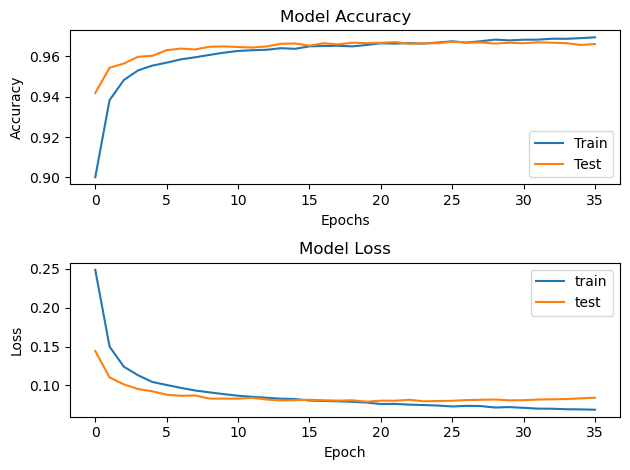

In [261]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP_S_CUSTOMLOSS.history['accuracy'])
plt.plot(NN_Classifier_DP_S_CUSTOMLOSS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP_S_CUSTOMLOSS.history['loss'])
plt.plot(NN_Classifier_DP_S_CUSTOMLOSS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [262]:
y_pred=(model_dp_sp_clf.predict(X_test_s) > 0.5).astype(int)   
acc = accuracy_score(y_test_s, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout, Custom loss function", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  96.74%


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14664
           1       0.97      0.95      0.96     11312

    accuracy                           0.97     25976
   macro avg       0.97      0.97      0.97     25976
weighted avg       0.97      0.97      0.97     25976



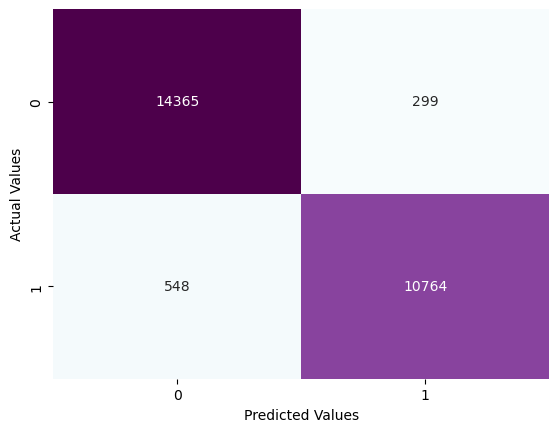

In [263]:
print(classification_report(y_test_s, y_pred))
sns.heatmap(confusion_matrix(y_test_s, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [264]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN bez PCA, sa Dropout, Custom loss function",Standardizacija,96.74%
1,"ANN sa PCA, sa Dropout",Standardizacija,95.88%
2,"ANN sa PCA, sa Dropout",Normalizacija,95.95%
3,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
4,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
5,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
6,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Konstantni Learning Rate</h2>
</div>`

In [265]:
model_lr = Sequential()
model_lr.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_lr.add(Dropout(0.3))
model_lr.add(Dense(256, activation='relu'))
model_lr.add(Dense(256, activation='relu'))
model_lr.add(Dropout(0.3))
model_lr.add(Dense(128, activation='relu'))
model_lr.add(Dense(1, activation='sigmoid'))

In [266]:
model_lr.compile(loss='binary_crossentropy',
                   optimizer=Adam(learning_rate=0.001),  # use the optimizer object with specified learning rate
                   metrics=['accuracy'])

In [267]:
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [268]:
NN_Classifier_DP_S_LR = model_lr.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 3s - loss: 0.2548 - accuracy: 0.8986 - val_loss: 0.1696 - val_accuracy: 0.9321 - 3s/epoch - 25ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1717 - accuracy: 0.9304 - val_loss: 0.1425 - val_accuracy: 0.9424 - 2s/epoch - 16ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1493 - accuracy: 0.9401 - val_loss: 0.1287 - val_accuracy: 0.9484 - 2s/epoch - 16ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1373 - accuracy: 0.9438 - val_loss: 0.1236 - val_accuracy: 0.9474 - 2s/epoch - 15ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1300 - accuracy: 0.9469 - val_loss: 0.1183 - val_accuracy: 0.9506 - 2s/epoch - 15ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1241 - accuracy: 0.9488 - val_loss: 0.1170 - val_accuracy: 0.9521 - 2s/epoch - 16ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1195 - accuracy: 0.9508 - val_loss: 0.1117 - val_accuracy: 0.9537 - 2s/epoch - 16ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.1151 - accuracy: 0.9524 - val_loss: 0.1099 - val_accuracy: 0.9529 - 2s/epoch - 16ms/step


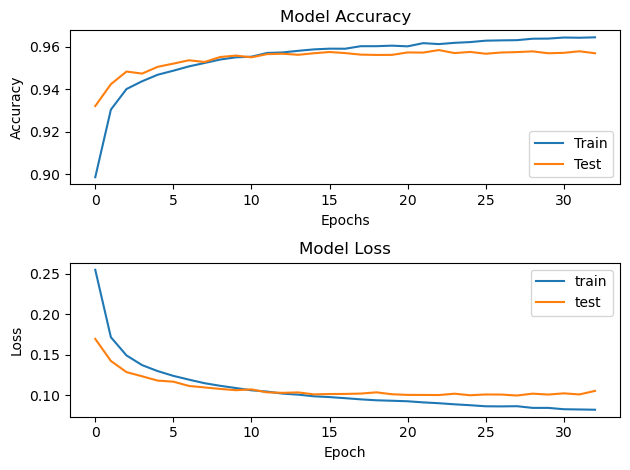

In [269]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP_S_LR.history['accuracy'])
plt.plot(NN_Classifier_DP_S_LR.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP_S_LR.history['loss'])
plt.plot(NN_Classifier_DP_S_LR.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [270]:
y_pred=(model_lr.predict(X_test) > 0.5).astype(int)   
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout, LR 0.001", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1
testing = testing.sort_index()

812/812 [==============================] - 1s 1ms/step
Accuracy Score:  95.85%


In [271]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
0,"ANN bez PCA, sa Dropout, LR 0.001",Standardizacija,95.85%
1,"ANN bez PCA, sa Dropout, Custom loss function",Standardizacija,96.74%
2,"ANN sa PCA, sa Dropout",Standardizacija,95.88%
3,"ANN sa PCA, sa Dropout",Normalizacija,95.95%
4,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
5,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
6,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
7,"ANN bez PCA, bez Dropout",Normalizacija,96.25%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Custom (Dynamic) Learning Rate</h2>
</div>`

In [272]:
model_custom_lr = Sequential()
model_custom_lr.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_custom_lr.add(Dropout(0.3))
model_custom_lr.add(Dense(256, activation='relu'))
model_custom_lr.add(Dense(256, activation='relu'))
model_custom_lr.add(Dropout(0.3))
model_custom_lr.add(Dense(128, activation='relu'))
model_custom_lr.add(Dense(1, activation='sigmoid'))

In [273]:
def lr_schedule(epoch, lr):
    """
    Learning rate schedule function.
    """
    if epoch < 10:
        return lr
    else:
        return lr * 0.1


In [274]:
# Compile the model
optimizer = Adam(learning_rate=0.01)
model_custom_lr.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define the learning rate schedule callback
lr_scheduler = LearningRateScheduler(lr_schedule)

In [275]:
# Train the model
MODEL_CUSTOM_LR = model_custom_lr.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es,lr_scheduler],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/1000
104/104 - 3s - loss: 0.2659 - accuracy: 0.8952 - val_loss: 0.1605 - val_accuracy: 0.9341 - lr: 0.0100 - 3s/epoch - 29ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1598 - accuracy: 0.9354 - val_loss: 0.1375 - val_accuracy: 0.9414 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1402 - accuracy: 0.9430 - val_loss: 0.1295 - val_accuracy: 0.9469 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1322 - accuracy: 0.9471 - val_loss: 0.1188 - val_accuracy: 0.9518 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1251 - accuracy: 0.9488 - val_loss: 0.1190 - val_accuracy: 0.9510 - lr: 0.0100 - 2s/epoch - 19ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1210 - accuracy: 0.9504 - val_loss: 0.1140 - val_accuracy: 0.9521 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1184 - accuracy: 0.9518 - val_loss: 0.1120 - val_accuracy: 0.9534 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 8/1000
104/104 - 2s - loss: 

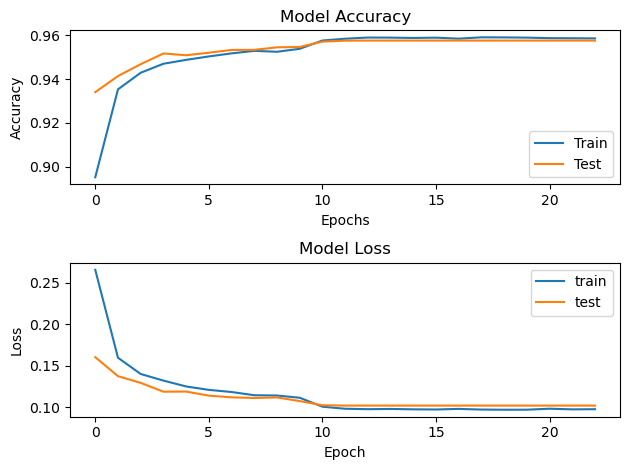

In [276]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(MODEL_CUSTOM_LR.history['accuracy'])
plt.plot(MODEL_CUSTOM_LR.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(MODEL_CUSTOM_LR.history['loss'])
plt.plot(MODEL_CUSTOM_LR.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [277]:
y_pred=(model_custom_lr.predict(X_test) > 0.5).astype(int)   
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout, Custom LR", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1

812/812 [==============================] - 1s 2ms/step
Accuracy Score:  95.77%


In [278]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
1,"ANN bez PCA, sa Dropout, LR 0.001",Standardizacija,95.85%
2,"ANN bez PCA, sa Dropout, Custom loss function",Standardizacija,96.74%
3,"ANN sa PCA, sa Dropout",Standardizacija,95.88%
4,"ANN sa PCA, sa Dropout",Normalizacija,95.95%
5,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
6,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
7,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
8,"ANN bez PCA, bez Dropout",Normalizacija,96.25%
0,"ANN bez PCA, sa Dropout, Custom LR",Standardizacija,95.77%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Learning Rate u zavisnosti od loss-a</h2>
</div>`

In [279]:
model_custom_lr_OP = Sequential()
model_custom_lr_OP.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_custom_lr_OP.add(Dropout(0.3))
model_custom_lr_OP.add(Dense(256, activation='relu'))
model_custom_lr_OP.add(Dense(256, activation='relu'))
model_custom_lr_OP.add(Dropout(0.3))
model_custom_lr_OP.add(Dense(128, activation='relu'))
model_custom_lr_OP.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model_custom_lr_OP.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#In this example, the learning rate will be reduced by a factor of 0.1 if the validation loss does not improve for 5 epochs. The minimum learning rate is set to 0.00001.
reduce_lr_op = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=5, min_lr=0.00001)

NN_Classifier_DP_S_LR_OP = model_custom_lr_OP.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es, reduce_lr_op], # Add the learning rate scheduler callback here
                          verbose=2,
                          validation_data=(X_test, y_test))


Epoch 1/1000
104/104 - 3s - loss: 0.2622 - accuracy: 0.8955 - val_loss: 0.1693 - val_accuracy: 0.9312 - lr: 0.0100 - 3s/epoch - 27ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1615 - accuracy: 0.9345 - val_loss: 0.1401 - val_accuracy: 0.9417 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1420 - accuracy: 0.9420 - val_loss: 0.1283 - val_accuracy: 0.9474 - lr: 0.0100 - 2s/epoch - 17ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1318 - accuracy: 0.9461 - val_loss: 0.1230 - val_accuracy: 0.9493 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1259 - accuracy: 0.9490 - val_loss: 0.1196 - val_accuracy: 0.9508 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1208 - accuracy: 0.9503 - val_loss: 0.1134 - val_accuracy: 0.9519 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1186 - accuracy: 0.9515 - val_loss: 0.1155 - val_accuracy: 0.9526 - lr: 0.0100 - 2s/epoch - 18ms/step
Epoch 8/1000
104/104 - 2s - loss: 

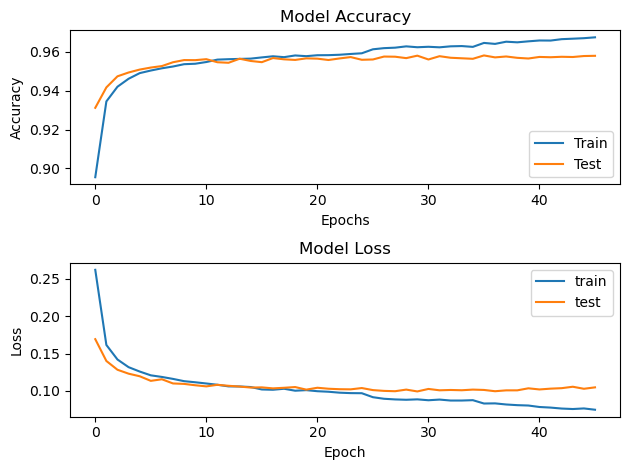

In [280]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier_DP_S_LR_OP.history['accuracy'])
plt.plot(NN_Classifier_DP_S_LR_OP.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier_DP_S_LR_OP.history['loss'])
plt.plot(NN_Classifier_DP_S_LR_OP.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [281]:
y_pred=(model_custom_lr_OP.predict(X_test) > 0.5).astype(int)   
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout, ReduceLROnPlateau", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1

812/812 [==============================] - 1s 2ms/step
Accuracy Score:  95.81%


In [282]:
testing

,Algoritam,Normalizacija/Standardizacija,Accuracy
2,"ANN bez PCA, sa Dropout, LR 0.001",Standardizacija,95.85%
3,"ANN bez PCA, sa Dropout, Custom loss function",Standardizacija,96.74%
4,"ANN sa PCA, sa Dropout",Standardizacija,95.88%
5,"ANN sa PCA, sa Dropout",Normalizacija,95.95%
6,"ANN bez PCA, sa Dropout",Standardizacija,96.72%
7,"ANN bez PCA, bez Dropout",Standardizacija,96.42%
8,"ANN bez PCA, sa Dropout",Normalizacija,96.44%
9,"ANN bez PCA, bez Dropout",Normalizacija,96.25%
1,"ANN bez PCA, sa Dropout, Custom LR",Standardizacija,95.77%
0,"ANN bez PCA, sa Dropout, ReduceLROnPlateau",Standardizacija,95.81%


<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px; text-align: center;">

<h2 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Comic Sans MS">
Learning Rate u zavisnosti od granica (epoha)</h2>
</div>`

In [ ]:
model_custom_lr_PCD = Sequential()
model_custom_lr_PCD.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model_custom_lr_PCD.add(Dropout(0.3))
model_custom_lr_PCD.add(Dense(256, activation='relu'))
model_custom_lr_PCD.add(Dense(256, activation='relu'))
model_custom_lr_PCD.add(Dropout(0.3))
model_custom_lr_PCD.add(Dense(128, activation='relu'))
model_custom_lr_PCD.add(Dense(1, activation='sigmoid'))

boundaries = [35, 800]
values = [0.01, 0.001, 0.0001]
learning_rate_schedule = PiecewiseConstantDecay(boundaries, values)
optimizer = Adam(learning_rate=learning_rate_schedule)

model_custom_lr_PCD.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

NN_Classifier_DP_S_LR_PCD = model_custom_lr_PCD.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es], # Add the learning rate scheduler callback here
                          verbose=2,
                          validation_data=(X_test, y_test))




Epoch 1/1000
104/104 - 3s - loss: 0.2533 - accuracy: 0.8969 - val_loss: 0.1778 - val_accuracy: 0.9305 - 3s/epoch - 27ms/step
Epoch 2/1000
104/104 - 2s - loss: 0.1810 - accuracy: 0.9284 - val_loss: 0.1589 - val_accuracy: 0.9358 - 2s/epoch - 17ms/step
Epoch 3/1000
104/104 - 2s - loss: 0.1642 - accuracy: 0.9341 - val_loss: 0.1455 - val_accuracy: 0.9407 - 2s/epoch - 17ms/step
Epoch 4/1000
104/104 - 2s - loss: 0.1521 - accuracy: 0.9391 - val_loss: 0.1371 - val_accuracy: 0.9447 - 2s/epoch - 17ms/step
Epoch 5/1000
104/104 - 2s - loss: 0.1429 - accuracy: 0.9426 - val_loss: 0.1297 - val_accuracy: 0.9458 - 2s/epoch - 17ms/step
Epoch 6/1000
104/104 - 2s - loss: 0.1336 - accuracy: 0.9463 - val_loss: 0.1235 - val_accuracy: 0.9495 - 2s/epoch - 17ms/step
Epoch 7/1000
104/104 - 2s - loss: 0.1284 - accuracy: 0.9480 - val_loss: 0.1190 - val_accuracy: 0.9509 - 2s/epoch - 18ms/step
Epoch 8/1000
104/104 - 2s - loss: 0.1230 - accuracy: 0.9497 - val_loss: 0.1157 - val_accuracy: 0.9521 - 2s/epoch - 18ms/step


104/104 - 2s - loss: 0.1002 - accuracy: 0.9583 - val_loss: 0.1051 - val_accuracy: 0.9559 - 2s/epoch - 18ms/step
Epoch 67/1000
104/104 - 2s - loss: 0.0995 - accuracy: 0.9584 - val_loss: 0.1049 - val_accuracy: 0.9563 - 2s/epoch - 18ms/step
Epoch 68/1000
104/104 - 2s - loss: 0.0995 - accuracy: 0.9589 - val_loss: 0.1049 - val_accuracy: 0.9561 - 2s/epoch - 19ms/step
Epoch 69/1000
104/104 - 2s - loss: 0.0988 - accuracy: 0.9589 - val_loss: 0.1046 - val_accuracy: 0.9562 - 2s/epoch - 18ms/step
Epoch 70/1000
104/104 - 2s - loss: 0.0990 - accuracy: 0.9589 - val_loss: 0.1048 - val_accuracy: 0.9563 - 2s/epoch - 18ms/step
Epoch 71/1000
104/104 - 2s - loss: 0.0988 - accuracy: 0.9589 - val_loss: 0.1050 - val_accuracy: 0.9558 - 2s/epoch - 18ms/step
Epoch 72/1000
104/104 - 2s - loss: 0.0977 - accuracy: 0.9596 - val_loss: 0.1046 - val_accuracy: 0.9565 - 2s/epoch - 17ms/step
Epoch 73/1000


In [ ]:
y_pred=(model_custom_lr_PCD.predict(X_test) > 0.5).astype(int)   
acc = accuracy_score(y_test, y_pred)*100
print('Accuracy Score: ', '{:.2f}%'.format(acc))
testing.loc[-1] = ["ANN bez PCA, sa Dropout, PiecewiseConstantDecay", "Standardizacija", '{:.2f}%'.format(acc)]
testing.index = testing.index + 1

In [ ]:
testing